In [ ]:
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
from decouple import Config, RepositoryEnv

import yfinance as yf
import matplotlib.pyplot as plt

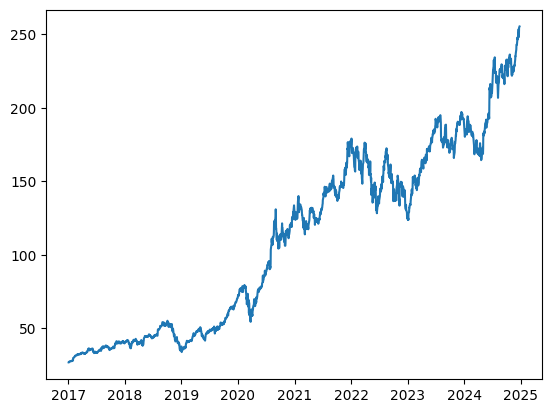

In [ ]:
# Get Data
tickerName = 'AAPL'
startDate = "2017-01-01"
endDate = "2024-12-24"

ticker = yf.Ticker(tickerName)
ticker_data = ticker.history(start=startDate,\
                             end=endDate)

# Picking Close Data
close_data = ticker_data['Close']

plt.plot(close_data.index, close_data.values, linestyle='-')
plt.show()

In [17]:
url = 'https://api.alpaca.markets/v2/account'

# Make your own .env file with your own api key and secret key
env_path = './.env'
config = Config(RepositoryEnv(env_path))

api_key = config('TRADING_API_KEY')
api_secret = config('TRADING_API_SECRET')
print(api_key, api_secret)

trading_client = TradingClient(api_key, api_secret, paper=False)

# Get our account information.
account = trading_client.get_account()

# Check if our account is restricted from trading.
if account.trading_blocked:
    print('Account is currently restricted from trading.')

# Check how much money we can use to open new positions.
print('${} is available as buying power.'.format(account.buying_power))

AK4ZLAGTED4Q7QR4ZK5U AOtalTXxh2qQFG1RFW6sccbzyPKzSPqG1E0fwlCL
$18513.33 is available as buying power.


## data crawling

In [13]:
import requests
from bs4 import BeautifulSoup

URL = "https://finviz.com/news.ashx"
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}


def crawl(url):
    """Crawls a given URL and extracts links."""
    try:
        response = requests.get(url, headers=HEADERS)
        response.raise_for_status()  # Raise an exception for bad status codes

        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract links
        links = [a['href'] for a in soup.find_all('a', href=True)]
        return links

    except requests.exceptions.RequestException as e:
        print(f"Error crawling {url}: {e}")
        return []

if __name__ == "__main__":
    start_url = "https://finviz.com/news.ashx?v=3"
    links = crawl(start_url)

    for link in links:
        if link.startswith('https://'):
            print(end='\n')
            print(link, end=' ')
        elif link.startswith('quote'):
            print(link.split('=')[1], end=' ')



https://www.globenewswire.com/news-release/2024/12/27/3002115/8267/en/Himax-to-Showcase-Industry-Leading-400K-Nits-Ultra-Luminous-Color-Sequential-Front-lit-LCoS-Microdisplay-at-CES-2025.html HIMX 
https://www.prnewswire.com/news-releases/jinkosolar-announces-results-of-2024-annual-general-meeting-302339506.html JKS 
https://finance.yahoo.com/news/stock-market-today-asian-shares-042532486.html COMP 
https://finance.yahoo.com/news/bitcoin-rally-fizzles-token-record-010519874.html MSTR 
https://www.digitimes.com/news/a20241224PD209/broadcom-ceo-ai-investment-growth.html AVGO 
https://www.prnewswire.com/news-releases/pixelworks-empowers-iqoo-z9-turbo-l-smartphone-to-deliver-a-flagship-visual-display-experience-302339368.html PXLW 
https://www.digitimes.com/news/a20241227VL204/masayoshi-son-nvidia-arm-donald-trump.html NVDA 
https://www.digitimes.com/news/a20241227PD211/tesla-shanghai-battery-energy-storage-production.html TSLA 
https://finance.yahoo.com/news/boj-signals-january-rate-hike

In [3]:
r = requests.get(start_url)
print(r.text)


<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h2{font-size:1.25rem;line-height:1.5rem}}#challenge-error-text{background-image:url();background-repeat:no-repeat;background-s

In [7]:
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

r = requests.get(start_url, headers=HEADERS)
print(r.text)


<!DOCTYPE html>
<html lang="en" class=" dark">
<head>
<title>Stocks News</title>
<meta charset="UTF-8"><meta name="viewport" content="width=1024"><meta name="description" content="Stock screener for investors and traders, financial visualizations.">
<meta http-equiv="Refresh" content="3600">

            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-700.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/lato-v17-latin-ext_latin-900.woff2" as="font" crossorigin>
            <link rel="preload" href="/fonts/inter-latin.woff2" as="font" crossorigin>
        
            <script>
                window.notificationsArray = [];
                window.renderScriptNotLoaded = function () {};
                window.handleScriptNotLoaded = function (element) {
                    window.notificationsArray.push(element);
                    window.sentry